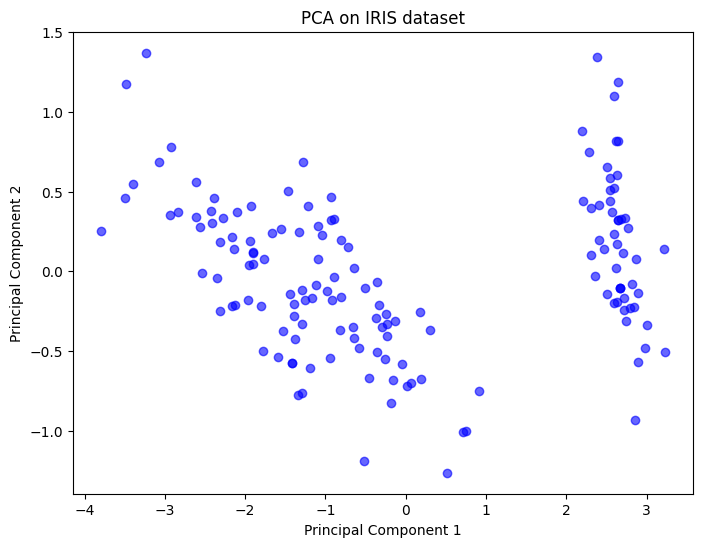

Explained Variance Ratio (first 2 components): [0.92461621 0.05301557]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("IRIS.csv")

# Drop non-numeric columns (like 'species' if it exists)
numeric_data = data.select_dtypes(include=[np.number])

# Step 2: Standardize (mean = 0, variance = 1)
X = numeric_data.values
X_meaned = X - np.mean(X, axis=0)

# Step 3: Compute covariance matrix
cov_mat = np.cov(X_meaned, rowvar=False)

# Step 4: Compute eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

# Step 5: Sort eigenvalues (and eigenvectors) in descending order
sorted_index = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_index]
eigen_vectors = eigen_vectors[:, sorted_index]

# Step 6: Choose top k eigenvectors (e.g., k=2)
k = 2
eigenvector_subset = eigen_vectors[:, :k]

# Step 7: Transform the data
X_reduced = np.dot(X_meaned, eigenvector_subset)

# Step 8: Visualize (if possible)
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color='blue', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on IRIS dataset')
plt.show()

# Optional: Print explained variance ratio
explained_variance = eigen_values / np.sum(eigen_values)
print("Explained Variance Ratio (first 2 components):", explained_variance[:2])
